# Etude de cas - DCBrain

Dans le cadre de l'optimisation du réseau de transport d'un client, le client nous a envoyé l'ensemble des tractions constituant son réseau des transports.
Vous trouverez ci-joint, les tractions ayant au moins un passage à l'agence de Strasbourg (au départ, à l'arrivée ou en arrêt intermédiaire). Les données fournies n'ont pas été nettoyées et sont fournies telles que le client les a transmise.
Nous cherchons à analyser ces tractions et à sortir de ce fichier la liste des portions de trajets existantes.

## Questions :

1. Liste des portions de trajets du tableau
2. Calcul rmse des distances annoncées par les clients par rapport aux distances reelles.
3. Prix moyen du km payé pour les tractions passant par Starsbourg?
4. Courbe du prix du km en fonction du km parcouru.\
5. Quel est le tractionnaire le plus cher pour les tractions ayant un arrete à Starsbourg ?
6. Quels tractionnnaires présentent les couts de tractions les plus eleves ?
7. Quels tractionnaire totalisent le plus de kilomètres ?
8. Quelle agfence a achet le plus de metrage ?
9. Quel tractionnaire présente la vitesse moyenne la plus grande ?
10. Reporté au metrage, quelle agence le  moins au km ?
11. Quelles sont les principales erreurs ou problèmes présents dans les données ?
12. Plan d'action réaliste pour régler le problème de données avec le client (méthode)
13. Quels seraient les indicateurs métiers (kpi) utiles a montrer au client

In [1]:
# importations des bibliothèques
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

import datetime
from datetime import date, timedelta
import warnings

warnings.filterwarnings('ignore')
sns.set_style("whitegrid")

# Exploration et nettoyage des données
-
-


In [2]:
# Importation du dataframe "Plan de tractions base"
plan = pd.read_excel("/Users/teilo/Desktop/Projets/datasets/logistique/supplychain.xlsx", sheet_name="Plan de tractions base", header=3 # Suppression de l'header "Agence d'arrivée .."
                    ) 
plan

,N° Traction,N° de regroupement,Nom RA,Agence Départ,Tractionnaire,Heure départ,Agence 1,Heure Arrivée 1,Heure départ 1,Agence 2,...,Agence 4,Heure Arrivée 4,Heure départ 4,Agence 5,Heure Arrivée 5,Kms,"Type de matériel(CR, SR…)",Métrage acheté,Coûts tractions forfaitaires hors gasoil,Type Traction
0,33-24-87,33-24-87 / 67-87-33,//,CLT33,JIMENEZ,20H00,COMMAGNAC 24,22H15,22H45,MRCI 87,...,NaN,NaN,NaN,NaN,NaN,313.0,CR,15.0,404.326375,BI-WAY
1,33-24-87,33-24-87 / 67-87-33,//,CLT33,JIMENEZ,20H00,COMMAGNAC 24,22H15,22H45,MRCI 87,...,NaN,NaN,NaN,NaN,NaN,313.0,CR,15.0,32.878794,BI-WAY
2,67-87-33,33-24-87 / 67-87-33,678733A,CLT67,JIMENEZ,22H00,MRCI 87,14H30,15H30,CLT33,...,NaN,NaN,NaN,NaN,NaN,1035.0,CR,15.0,1272.120797,BI-WAY
3,67-93,67-93,6793A,CLT67,XENITRANS,19H30,CLT93,3H00,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,501.0,CR,15.0,954.259651,ONE-WAY
4,67-95-93,67-95-93,679593A,CLT67,TRANSAL,20H45,CLT95,3H45,4H00,CLT93,...,NaN,NaN,NaN,NaN,NaN,497.0,CR,15.0,506.539799,BI-WAY
5,54-57-67,54-57-67-54,545767A,CLT54,CHERRIER,18H30,CLT57,19H45,20H30,CLT67,...,NaN,NaN,NaN,NaN,NaN,261.0,SR,13.5,309.252542,BI-WAY
6,57-67,54-57-67-54,545767A,CLT57,CHERRIER,20H30,CLT67,22H45,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,SR,13.5,167.464513,BI-WAY
7,67-54,54-57-67-54,6754A,CLT67,CHERRIER,1H30,CLT54,3H15,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,236.0,SR,13.5,193.403235,BI-WAY
8,54-67,57-54-67-57,575467A,CLT54,CLIENT 57,20H45,CLT67,23H15,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,SR,13.5,312.051705,BI-WAY
9,57-54-67,57-54-67-57,575467A,CLT57,CLIENT 57,19H00,CLT54,20H15,20H45,CLT67,...,NaN,NaN,NaN,NaN,NaN,162.0,SR,13.5,0.000000,BI-WAY


In [3]:
# Analyse du dataframe et exploration
plan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 25 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   N° Traction                               42 non-null     object 
 1   N° de regroupement                        42 non-null     object 
 2   Nom RA                                    42 non-null     object 
 3   Agence Départ                             42 non-null     object 
 4   Tractionnaire                             42 non-null     object 
 5   Heure départ                              42 non-null     object 
 6   Agence 1                                  42 non-null     object 
 7   Heure Arrivée 1                           42 non-null     object 
 8   Heure départ 1                            18 non-null     object 
 9   Agence 2                                  18 non-null     object 
 10  Heure Arrivée 2                         

On remarque que sur le dataframe (25 colonnes), il y a 42 entrées, elles ont toutes une agence de départ et d'arrivée (Agence 1). Puis, 18 ont effectuées un autres départ et sont arrivées en Agence 2. Parmis ces 18, 3 ont effectuées un autres départ et son arrivées en Agence 3 et sur ces 3 voyages, seulement 1 est allée jusqu'en Agence 4. Aucune n'est allées en Agence 5.

Il semble manquer une information concernant le "type de matériel", le "métrage acheté" et le "type de traction". Nous investiguerons cela plus tard.

In [4]:
# Suppression des colonnes sans données
plan = plan.drop(columns={"Heure départ 4", "Agence 5", "Heure Arrivée 5"})

In [5]:
plan.head()

,N° Traction,N° de regroupement,Nom RA,Agence Départ,Tractionnaire,Heure départ,Agence 1,Heure Arrivée 1,Heure départ 1,Agence 2,...,Agence 3,Heure Arrivée 3,Heure départ 3,Agence 4,Heure Arrivée 4,Kms,"Type de matériel(CR, SR…)",Métrage acheté,Coûts tractions forfaitaires hors gasoil,Type Traction
0,33-24-87,33-24-87 / 67-87-33,//,CLT33,JIMENEZ,20H00,COMMAGNAC 24,22H15,22H45,MRCI 87,...,NaN,NaN,NaN,NaN,NaN,313.0,CR,15.0,404.326375,BI-WAY
1,33-24-87,33-24-87 / 67-87-33,//,CLT33,JIMENEZ,20H00,COMMAGNAC 24,22H15,22H45,MRCI 87,...,NaN,NaN,NaN,NaN,NaN,313.0,CR,15.0,32.878794,BI-WAY
2,67-87-33,33-24-87 / 67-87-33,678733A,CLT67,JIMENEZ,22H00,MRCI 87,14H30,15H30,CLT33,...,NaN,NaN,NaN,NaN,NaN,1035.0,CR,15.0,1272.120797,BI-WAY
3,67-93,67-93,6793A,CLT67,XENITRANS,19H30,CLT93,3H00,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,501.0,CR,15.0,954.259651,ONE-WAY
4,67-95-93,67-95-93,679593A,CLT67,TRANSAL,20H45,CLT95,3H45,4H00,CLT93,...,NaN,NaN,NaN,NaN,NaN,497.0,CR,15.0,506.539799,BI-WAY


In [6]:
# Recherche des lignes ou les valeurs sont manquantes.
nan_rows = plan[(plan['Type de matériel(CR, SR…)'].isnull()) | (plan['Type Traction'].isnull()) | (plan['Métrage acheté'].isnull())] # Ajout des 3 variables pour obtenir toutes les données dans un dataframe.
nan_rows

,N° Traction,N° de regroupement,Nom RA,Agence Départ,Tractionnaire,Heure départ,Agence 1,Heure Arrivée 1,Heure départ 1,Agence 2,...,Agence 3,Heure Arrivée 3,Heure départ 3,Agence 4,Heure Arrivée 4,Kms,"Type de matériel(CR, SR…)",Métrage acheté,Coûts tractions forfaitaires hors gasoil,Type Traction
22,51-67,67-51-67,5167.0,Etoile Champenoise 51,CLIENT 67,1H45,CLT67,6H15,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,322.0,NaN,NaN,0.0,NaN


In [7]:
# Recherche des doublons
plan.duplicated(subset=['N° Traction', 'N° de regroupement', 'Nom RA'])
# Seul la premiere ligne est en doublon

0     False
1      True
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33    False
34    False
35    False
36    False
37    False
38    False
39    False
40    False
41    False
dtype: bool

In [8]:
# Montre les les tractions en doublons ou possedant le meme numéro
plan.loc[plan['N° Traction'].duplicated(keep=False)]

,N° Traction,N° de regroupement,Nom RA,Agence Départ,Tractionnaire,Heure départ,Agence 1,Heure Arrivée 1,Heure départ 1,Agence 2,...,Agence 3,Heure Arrivée 3,Heure départ 3,Agence 4,Heure Arrivée 4,Kms,"Type de matériel(CR, SR…)",Métrage acheté,Coûts tractions forfaitaires hors gasoil,Type Traction
0,33-24-87,33-24-87 / 67-87-33,//,CLT33,JIMENEZ,20H00,COMMAGNAC 24,22H15,22H45,MRCI 87,...,NaN,NaN,NaN,NaN,NaN,313.0,CR,15.0,404.326375,BI-WAY
1,33-24-87,33-24-87 / 67-87-33,//,CLT33,JIMENEZ,20H00,COMMAGNAC 24,22H15,22H45,MRCI 87,...,NaN,NaN,NaN,NaN,NaN,313.0,CR,15.0,32.878794,BI-WAY
6,57-67,54-57-67-54,545767A,CLT57,CHERRIER,20H30,CLT67,22H45,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,SR,13.5,167.464513,BI-WAY
11,57-67,59-51-57-67-59,59515767A,CLT57,XENITRANS,3H00,CLT67,5H30,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,Remorque,7.5,0.000000,BI-WAY


In [9]:
# Regroupement par numero de regroupement
plan.loc[plan['N° de regroupement'].duplicated(keep=False)]

,N° Traction,N° de regroupement,Nom RA,Agence Départ,Tractionnaire,Heure départ,Agence 1,Heure Arrivée 1,Heure départ 1,Agence 2,...,Agence 3,Heure Arrivée 3,Heure départ 3,Agence 4,Heure Arrivée 4,Kms,"Type de matériel(CR, SR…)",Métrage acheté,Coûts tractions forfaitaires hors gasoil,Type Traction
0,33-24-87,33-24-87 / 67-87-33,//,CLT33,JIMENEZ,20H00,COMMAGNAC 24,22H15,22H45,MRCI 87,...,NaN,NaN,NaN,NaN,NaN,313.0,CR,15.0,404.326375,BI-WAY
1,33-24-87,33-24-87 / 67-87-33,//,CLT33,JIMENEZ,20H00,COMMAGNAC 24,22H15,22H45,MRCI 87,...,NaN,NaN,NaN,NaN,NaN,313.0,CR,15.0,32.878794,BI-WAY
2,67-87-33,33-24-87 / 67-87-33,678733A,CLT67,JIMENEZ,22H00,MRCI 87,14H30,15H30,CLT33,...,NaN,NaN,NaN,NaN,NaN,1035.0,CR,15.0,1272.120797,BI-WAY
5,54-57-67,54-57-67-54,545767A,CLT54,CHERRIER,18H30,CLT57,19H45,20H30,CLT67,...,NaN,NaN,NaN,NaN,NaN,261.0,SR,13.5,309.252542,BI-WAY
6,57-67,54-57-67-54,545767A,CLT57,CHERRIER,20H30,CLT67,22H45,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,SR,13.5,167.464513,BI-WAY
7,67-54,54-57-67-54,6754A,CLT67,CHERRIER,1H30,CLT54,3H15,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,236.0,SR,13.5,193.403235,BI-WAY
8,54-67,57-54-67-57,575467A,CLT54,CLIENT 57,20H45,CLT67,23H15,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,SR,13.5,312.051705,BI-WAY
9,57-54-67,57-54-67-57,575467A,CLT57,CLIENT 57,19H00,CLT54,20H15,20H45,CLT67,...,NaN,NaN,NaN,NaN,NaN,162.0,SR,13.5,0.000000,BI-WAY
10,67-57,57-54-67-57,6757A,CLT67,CLIENT 57,1H30,CLT57,3H30,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,162.0,SR,13.5,133.687120,BI-WAY
11,57-67,59-51-57-67-59,59515767A,CLT57,XENITRANS,3H00,CLT67,5H30,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,Remorque,7.5,0.000000,BI-WAY


In [10]:
list_portion = plan[['N° Traction', 'N° de regroupement','Agence Départ', "Agence 1", "Agence 2", "Agence 3", "Agence 4"]]

In [11]:
portion = list_portion

In [12]:
# Obtention des portions de transport passant par le client
# Suppression des lignes qui ne contiennent pas le client

search = 'CLT67'

for i in portion.index:    
    if portion['Agence Départ'][i] == search: pass
    
    elif portion['Agence 1'][i] == search: pass
    
    elif portion['Agence 2'][i] == search: pass
        
    elif portion['Agence 3'][i] == search: pass
        
    elif portion['Agence 4'][i] == search: pass
    
    else: portion = portion.drop([i])

portion

,N° Traction,N° de regroupement,Agence Départ,Agence 1,Agence 2,Agence 3,Agence 4
2,67-87-33,33-24-87 / 67-87-33,CLT67,MRCI 87,CLT33,NaN,NaN
3,67-93,67-93,CLT67,CLT93,NaN,NaN,NaN
4,67-95-93,67-95-93,CLT67,CLT95,CLT93,NaN,NaN
5,54-57-67,54-57-67-54,CLT54,CLT57,CLT67,NaN,NaN
6,57-67,54-57-67-54,CLT57,CLT67,NaN,NaN,NaN
7,67-54,54-57-67-54,CLT67,CLT54,NaN,NaN,NaN
8,54-67,57-54-67-57,CLT54,CLT67,NaN,NaN,NaN
9,57-54-67,57-54-67-57,CLT57,CLT54,CLT67,NaN,NaN
10,67-57,57-54-67-57,CLT67,CLT57,NaN,NaN,NaN
11,57-67,59-51-57-67-59,CLT57,CLT67,NaN,NaN,NaN


In [13]:
portion.loc[22, 'Agence Départ'] = 'ETOILE CHAMPENOISE 51'

In [14]:
portion['Agence Départ'].count()

37

In [15]:
for i in portion['N° Traction']:
    print(i) 

67-87-33
67-93
67-95-93
54-57-67
57-67
67-54
54-67
57-54-67
67-57
57-67
59-51-57-67
67-59
67-01-69
69-67
67-13
67-21-69
67-26-84
67-31
35-72-67
67-35
51-67
67-51-67
67-68B
68-67B
67-84
67-71-71-42-69
67-72
67-72-44
67-74-73-38
67-76-14
67-79
67-94-45
94-67
67-94
95-67
67-68A
68-67A


# 2) Calcul de l'erreur moyenne absolue observée sur le kilométrage annoncé par le client.

In [16]:
# Ajout du dataframe contenant les codes NXXX
agences = pd.read_excel("/Users/teilo/Desktop/Projets/datasets/logistique/dcbrain.xlsx", sheet_name="LISTE AGENCES").drop(columns=['Nom ficHier Partenaires/Agences', 'CLIENT/partenaire ?']).rename(columns={'Nom ficHier traction': 'Agence', 'Code NXXX': 'Code'})          
agences

,Agence,Code
0,CLT06,N006
1,MBS 08,N008
2,CLT13,N013
3,MRCI 18,N018
4,CLT31,N031
...,...,...
99,CLT 69,N069
100,DUMARTIN,N402
101,BLANC,N262
102,DISTRIPALET 04,N407


In [17]:
# Creation d'un dataframe pour chaque agence afin de merger avec le bon code.
agenced = agences.rename(columns={"Agence" : "Agence Départ", "Code": "Code"})
agence1 = agences.rename(columns={"Agence" : "Agence 1", "Code": "Code1"})
agence2 = agences.rename(columns={"Agence" : "Agence 2", "Code": "Code2"})
agence3 = agences.rename(columns={"Agence" : "Agence 3", "Code": "Code3"})
agence4 = agences.rename(columns={"Agence" : "Agence 4", "Code": "Code4"})

In [18]:
portion.loc[portion['Agence Départ'] == 'CLT54']

,N° Traction,N° de regroupement,Agence Départ,Agence 1,Agence 2,Agence 3,Agence 4
5,54-57-67,54-57-67-54,CLT54,CLT57,CLT67,NaN,NaN
8,54-67,57-54-67-57,CLT54,CLT67,NaN,NaN,NaN


In [19]:
portion

,N° Traction,N° de regroupement,Agence Départ,Agence 1,Agence 2,Agence 3,Agence 4
2,67-87-33,33-24-87 / 67-87-33,CLT67,MRCI 87,CLT33,NaN,NaN
3,67-93,67-93,CLT67,CLT93,NaN,NaN,NaN
4,67-95-93,67-95-93,CLT67,CLT95,CLT93,NaN,NaN
5,54-57-67,54-57-67-54,CLT54,CLT57,CLT67,NaN,NaN
6,57-67,54-57-67-54,CLT57,CLT67,NaN,NaN,NaN
7,67-54,54-57-67-54,CLT67,CLT54,NaN,NaN,NaN
8,54-67,57-54-67-57,CLT54,CLT67,NaN,NaN,NaN
9,57-54-67,57-54-67-57,CLT57,CLT54,CLT67,NaN,NaN
10,67-57,57-54-67-57,CLT67,CLT57,NaN,NaN,NaN
11,57-67,59-51-57-67-59,CLT57,CLT67,NaN,NaN,NaN


In [20]:
df = pd.merge(portion, agenced, how='left', left_on=["Agence Départ"], right_on=['Agence Départ'])
df = pd.merge(df, agence1, how='left', left_on=["Agence 1"], right_on=['Agence 1'])
df = pd.merge(df, agence2, how='left', left_on=["Agence 2"], right_on=['Agence 2'])
df = pd.merge(df, agence3, how='left', left_on=["Agence 3"], right_on=['Agence 3'])
df = pd.merge(df, agence4, how='left', left_on=["Agence 4"], right_on=['Agence 4'])
df.head()

,N° Traction,N° de regroupement,Agence Départ,Agence 1,Agence 2,Agence 3,Agence 4,Code,Code1,Code2,Code3,Code4
0,67-87-33,33-24-87 / 67-87-33,CLT67,MRCI 87,CLT33,NaN,NaN,N067,N231,N033,NaN,NaN
1,67-93,67-93,CLT67,CLT93,NaN,NaN,NaN,N067,N939,NaN,NaN,NaN
2,67-95-93,67-95-93,CLT67,CLT95,CLT93,NaN,NaN,N067,N093,N939,NaN,NaN
3,54-57-67,54-57-67-54,CLT54,CLT57,CLT67,NaN,NaN,N054,N057,N067,NaN,NaN
4,57-67,54-57-67-54,CLT57,CLT67,NaN,NaN,NaN,N057,N067,NaN,NaN,NaN


In [21]:
# Manque le 68-84 (24-5 rows) + 76-14 (29-30 row) + 79-93-95 (37 row) + 2 premier voyage.

In [22]:
# Ajout du dataframe contenant les codes NXXX
distances = pd.read_excel("/Users/teilo/Desktop/Projets/datasets/logistique/dcbrain.xlsx", sheet_name="DISTANCES").rename(columns={"spatial distance in km": "Code"}).set_index('Code')
distances.head()

,N001,N002,N003,N006,N008,N009,N010,N013,N018,N020,...,N830,N842,N851,N862,N880,N891,N892,N939,RECY-51,VDL37
Code,,,,,,,,,,,,,,,,,,,,,
N001,0.00,501.20,190.17,445.55,489.13,588.98,323.57,369.40,285.61,380.08,...,453.54,298.10,602.23,430.86,297.06,285.60,333.27,450.25,404.77,438.48
N002,496.67,0.00,389.40,947.27,149.10,838.35,174.70,808.34,323.41,822.34,...,894.97,737.20,522.14,402.95,304.79,224.12,173.88,96.14,111.50,332.33
N003,192.98,395.14,0.00,630.07,450.77,523.33,248.63,480.58,117.70,491.82,...,567.52,405.71,426.13,261.36,374.62,186.48,227.51,316.11,339.95,269.04
N006,454.08,952.27,636.32,0.00,973.95,548.91,776.60,202.17,734.74,196.27,...,145.68,266.55,1053.52,838.77,758.61,748.93,799.65,919.80,869.52,882.10
N008,476.70,151.73,460.78,963.84,0.00,963.41,211.12,819.49,416.15,831.56,...,910.61,753.72,651.26,531.68,238.51,284.53,244.07,231.65,113.93,456.21


In [23]:
temp = pd.DataFrame(columns=['N° Traction', 'N° de regroupement', 'Code', 'km1', 'Code1', 'km2', 'Code2', 'km3', 'Code3', 'km4', 'Code4'])
temp

,N° Traction,N° de regroupement,Code,km1,Code1,km2,Code2,km3,Code3,km4,Code4


In [24]:
temp = pd.DataFrame(columns=['N° Traction', 'N° de regroupement', 'km1', 'km2', 'km3', 'km4'])

for i in df.index:
    km1 = distances.loc[df.Code[i], df.Code1[i]]
    
    if pd.isna(df.Code2[i]): km2 = 0
    else: km2 = distances.loc[df.Code1[i], df.Code2[i]]
    
    if pd.isna(df.Code3[i]): km3 = 0
    else: km3 = distances.loc[df.Code2[i], df.Code3[i]]
    
    if pd.isna(df.Code4[i]): km4 = 0
    else: km4 = distances.loc[df.Code3[i], df.Code4[i]]
     
    temp = temp.append({
        'N° Traction': df['N° Traction'][i], 'N° de regroupement': df['N° de regroupement'][i], 'km1': km1,'km2':km2,'km3':km3,'km4':km4,
    }, ignore_index=True);
        
temp['total_kms'] = temp['km1'] + temp['km2'] + temp['km3'] + temp['km4']
temp.head()

,N° Traction,N° de regroupement,km1,km2,km3,km4,total_kms
0,67-87-33,33-24-87 / 67-87-33,696.77,232.54,0,0,929.31
1,67-93,67-93,449.73,0,0,0,449.73
2,67-95-93,67-95-93,449.58,11.76,0,0,461.34
3,54-57-67,54-57-67-54,86.8,174.68,0,0,261.48
4,57-67,54-57-67-54,174.68,0,0,0,174.68


In [85]:
df1 = df.merge(temp, on=['N° Traction', 'N° de regroupement'], how='left')

In [86]:
tmp = plan[['N° Traction', 'N° de regroupement', 'Kms', 'Coûts tractions forfaitaires hors gasoil']]
df1 = df1.merge(tmp, on=['N° Traction', 'N° de regroupement'], how='left')


In [87]:
erreur = df1[['N° Traction', 'N° de regroupement', 'Agence Départ', 'km1', 'Agence 1', 'km2', 'Agence 2', 'km3', 'Agence 3', 'km4', 'Agence 4', 'total_kms', 'Kms']]
erreur

,N° Traction,N° de regroupement,Agence Départ,km1,Agence 1,km2,Agence 2,km3,Agence 3,km4,Agence 4,total_kms,Kms
0,67-87-33,33-24-87 / 67-87-33,CLT67,696.77,MRCI 87,232.54,CLT33,0,NaN,0,NaN,929.31,1035.0
1,67-93,67-93,CLT67,449.73,CLT93,0,NaN,0,NaN,0,NaN,449.73,501.0
2,67-95-93,67-95-93,CLT67,449.58,CLT95,11.76,CLT93,0,NaN,0,NaN,461.34,497.0
3,54-57-67,54-57-67-54,CLT54,86.8,CLT57,174.68,CLT67,0,NaN,0,NaN,261.48,261.0
4,57-67,54-57-67-54,CLT57,174.68,CLT67,0,NaN,0,NaN,0,NaN,174.68,0.0
5,67-54,54-57-67-54,CLT67,139.02,CLT54,0,NaN,0,NaN,0,NaN,139.02,236.0
6,54-67,57-54-67-57,CLT54,144.49,CLT67,0,NaN,0,NaN,0,NaN,144.49,0.0
7,57-54-67,57-54-67-57,CLT57,81.94,CLT54,144.49,CLT67,0,NaN,0,NaN,226.43,162.0
8,67-57,57-54-67-57,CLT67,177.05,CLT57,0,NaN,0,NaN,0,NaN,177.05,162.0
9,57-67,59-51-57-67-59,CLT57,174.68,CLT67,0,NaN,0,NaN,0,NaN,174.68,0.0


In [88]:
# Suppression des lignes avec des valeurs = 0
tmp = erreur.drop([4, 6, 9])
tmp

,N° Traction,N° de regroupement,Agence Départ,km1,Agence 1,km2,Agence 2,km3,Agence 3,km4,Agence 4,total_kms,Kms
0,67-87-33,33-24-87 / 67-87-33,CLT67,696.77,MRCI 87,232.54,CLT33,0,NaN,0,NaN,929.31,1035.0
1,67-93,67-93,CLT67,449.73,CLT93,0,NaN,0,NaN,0,NaN,449.73,501.0
2,67-95-93,67-95-93,CLT67,449.58,CLT95,11.76,CLT93,0,NaN,0,NaN,461.34,497.0
3,54-57-67,54-57-67-54,CLT54,86.8,CLT57,174.68,CLT67,0,NaN,0,NaN,261.48,261.0
5,67-54,54-57-67-54,CLT67,139.02,CLT54,0,NaN,0,NaN,0,NaN,139.02,236.0
7,57-54-67,57-54-67-57,CLT57,81.94,CLT54,144.49,CLT67,0,NaN,0,NaN,226.43,162.0
8,67-57,57-54-67-57,CLT67,177.05,CLT57,0,NaN,0,NaN,0,NaN,177.05,162.0
10,59-51-57-67,59-51-57-67-59,CLT59,239.7,ETOILE CHAMPENOISE 51,167.99,CLT57,174.68,CLT67,0,NaN,582.37,596.0
11,67-59,59-51-57-67-59,CLT67,506.66,CLT59,0,NaN,0,NaN,0,NaN,506.66,596.0
12,67-01-69,67-01-69-69-67,CLT67,398.06,DUPONT BEDU 01,73.97,CLT69,0,NaN,0,NaN,472.03,512.0


In [91]:
print('erreur moyenne absolue: ', mean_absolute_error(tmp['total_kms'],tmp['Kms']).round(3))
print('mape:', mean_absolute_percentage_error(tmp['total_kms'], tmp['Kms']).round(2))

erreur moyenne absolue:  40.735
mape: 0.11


# 3) Prix moyen /km payé pour les tractions passant par Strasbourg

In [30]:
tmp = plan[['N° Traction', 'N° de regroupement', 'Coûts tractions forfaitaires hors gasoil']]
couts = erreur.merge(tmp, on=['N° Traction', 'N° de regroupement'], how='left')
couts

,N° Traction,N° de regroupement,Agence Départ,km1,Agence 1,km2,Agence 2,km3,Agence 3,km4,Agence 4,total_kms,Kms,Coûts tractions forfaitaires hors gasoil
0,67-87-33,33-24-87 / 67-87-33,CLT67,696.77,MRCI 87,232.54,CLT33,0,NaN,0,NaN,929.31,1035.0,1272.120797
1,67-93,67-93,CLT67,449.73,CLT93,0,NaN,0,NaN,0,NaN,449.73,501.0,954.259651
2,67-95-93,67-95-93,CLT67,449.58,CLT95,11.76,CLT93,0,NaN,0,NaN,461.34,497.0,506.539799
3,54-57-67,54-57-67-54,CLT54,86.8,CLT57,174.68,CLT67,0,NaN,0,NaN,261.48,261.0,309.252542
4,57-67,54-57-67-54,CLT57,174.68,CLT67,0,NaN,0,NaN,0,NaN,174.68,0.0,167.464513
5,67-54,54-57-67-54,CLT67,139.02,CLT54,0,NaN,0,NaN,0,NaN,139.02,236.0,193.403235
6,54-67,57-54-67-57,CLT54,144.49,CLT67,0,NaN,0,NaN,0,NaN,144.49,0.0,312.051705
7,57-54-67,57-54-67-57,CLT57,81.94,CLT54,144.49,CLT67,0,NaN,0,NaN,226.43,162.0,0.000000
8,67-57,57-54-67-57,CLT67,177.05,CLT57,0,NaN,0,NaN,0,NaN,177.05,162.0,133.687120
9,57-67,59-51-57-67-59,CLT57,174.68,CLT67,0,NaN,0,NaN,0,NaN,174.68,0.0,0.000000


In [31]:
# Suppression des lignes comprennant des valeurs = 0
#couts = couts.drop([4,6,9])
#couts

In [32]:
couts

,N° Traction,N° de regroupement,Agence Départ,km1,Agence 1,km2,Agence 2,km3,Agence 3,km4,Agence 4,total_kms,Kms,Coûts tractions forfaitaires hors gasoil
0,67-87-33,33-24-87 / 67-87-33,CLT67,696.77,MRCI 87,232.54,CLT33,0,NaN,0,NaN,929.31,1035.0,1272.120797
1,67-93,67-93,CLT67,449.73,CLT93,0,NaN,0,NaN,0,NaN,449.73,501.0,954.259651
2,67-95-93,67-95-93,CLT67,449.58,CLT95,11.76,CLT93,0,NaN,0,NaN,461.34,497.0,506.539799
3,54-57-67,54-57-67-54,CLT54,86.8,CLT57,174.68,CLT67,0,NaN,0,NaN,261.48,261.0,309.252542
4,57-67,54-57-67-54,CLT57,174.68,CLT67,0,NaN,0,NaN,0,NaN,174.68,0.0,167.464513
5,67-54,54-57-67-54,CLT67,139.02,CLT54,0,NaN,0,NaN,0,NaN,139.02,236.0,193.403235
6,54-67,57-54-67-57,CLT54,144.49,CLT67,0,NaN,0,NaN,0,NaN,144.49,0.0,312.051705
7,57-54-67,57-54-67-57,CLT57,81.94,CLT54,144.49,CLT67,0,NaN,0,NaN,226.43,162.0,0.000000
8,67-57,57-54-67-57,CLT67,177.05,CLT57,0,NaN,0,NaN,0,NaN,177.05,162.0,133.687120
9,57-67,59-51-57-67-59,CLT57,174.68,CLT67,0,NaN,0,NaN,0,NaN,174.68,0.0,0.000000


In [33]:
# Calcul des couts/km
couts['couts_eu'] = (couts['Coûts tractions forfaitaires hors gasoil'] / couts['total_kms'])
couts1 = couts[(couts['Agence Départ'] != 'CLT67')]
couts1 = couts1.drop([7,9,20])
couts1

,N° Traction,N° de regroupement,Agence Départ,km1,Agence 1,km2,Agence 2,km3,Agence 3,km4,Agence 4,total_kms,Kms,Coûts tractions forfaitaires hors gasoil,couts_eu
3,54-57-67,54-57-67-54,CLT54,86.8,CLT57,174.68,CLT67,0,NaN,0,NaN,261.48,261.0,309.252542,1.182701
4,57-67,54-57-67-54,CLT57,174.68,CLT67,0,NaN,0,NaN,0,NaN,174.68,0.0,167.464513,0.958693
6,54-67,57-54-67-57,CLT54,144.49,CLT67,0,NaN,0,NaN,0,NaN,144.49,0.0,312.051705,2.159677
10,59-51-57-67,59-51-57-67-59,CLT59,239.7,ETOILE CHAMPENOISE 51,167.99,CLT57,174.68,CLT67,0,NaN,582.37,596.0,704.944654,1.210476
13,69-67,67-01-69-69-67,CLT69,469.47,CLT67,0,NaN,0,NaN,0,NaN,469.47,444.0,495.584075,1.055625
18,35-72-67,67-35 / 35-72-67,CLT35,138.08,CLT72,658.33,CLT67,0,NaN,0,NaN,796.41,830.0,504.629445,0.63363
23,68-67B,67-68-68-67,CLT68,103.57,CLT67,0,NaN,0,NaN,0,NaN,103.57,116.0,137.264048,1.325326
32,94-67,67-94-45-94-67,CLT94,458.34,CLT67,0,NaN,0,NaN,0,NaN,458.34,532.0,511.719429,1.116463
34,95-67,67-95-67,CLT95,459.3,CLT67,0,NaN,0,NaN,0,NaN,459.3,498.0,290.451433,0.632378
36,68-67A,68-67-67-68,CLT68,103.57,CLT67,0,NaN,0,NaN,0,NaN,103.57,116.0,141.047465,1.361856


In [34]:
print(couts1['couts_eu'].mean().round(2), '€')

1.16 €


# 4) Tracez la courbe du prix du km en fonction du km parcouru.

Ajouter le total_kms au df principale et calculer le couts par kms.

In [35]:
couts2 = couts.sort_values('total_kms').drop([9,7,20])
couts2

,N° Traction,N° de regroupement,Agence Départ,km1,Agence 1,km2,Agence 2,km3,Agence 3,km4,Agence 4,total_kms,Kms,Coûts tractions forfaitaires hors gasoil,couts_eu
36,68-67A,68-67-67-68,CLT68,103.57,CLT67,0,NaN,0,NaN,0,NaN,103.57,116.0,141.047465,1.361856
23,68-67B,67-68-68-67,CLT68,103.57,CLT67,0,NaN,0,NaN,0,NaN,103.57,116.0,137.264048,1.325326
35,67-68A,68-67-67-68,CLT67,103.82,CLT68,0,NaN,0,NaN,0,NaN,103.82,119.0,73.830805,0.711142
22,67-68B,67-68-68-67,CLT67,103.82,CLT68,0,NaN,0,NaN,0,NaN,103.82,119.0,163.809062,1.577818
5,67-54,54-57-67-54,CLT67,139.02,CLT54,0,NaN,0,NaN,0,NaN,139.02,236.0,193.403235,1.39119
6,54-67,57-54-67-57,CLT54,144.49,CLT67,0,NaN,0,NaN,0,NaN,144.49,0.0,312.051705,2.159677
4,57-67,54-57-67-54,CLT57,174.68,CLT67,0,NaN,0,NaN,0,NaN,174.68,0.0,167.464513,0.958693
8,67-57,57-54-67-57,CLT67,177.05,CLT57,0,NaN,0,NaN,0,NaN,177.05,162.0,133.687120,0.755081
3,54-57-67,54-57-67-54,CLT54,86.8,CLT57,174.68,CLT67,0,NaN,0,NaN,261.48,261.0,309.252542,1.182701
21,67-51-67,67-51-67,CLT67,311.86,ETOILE CHAMPENOISE 51,0,NaN,0,NaN,0,NaN,311.86,322.0,326.457539,1.046808


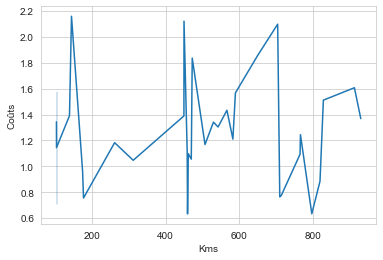

In [36]:
# Courbe des prix par kms 
ax = sns.lineplot(data=couts2, x='total_kms', y='couts_eu');
ax.set(xlabel='Kms', ylabel='Coûts');
plt.savefig('courbe_prix.png')

# 5) Quel est le tractionnaire le plus cher pour les tractions ayant un arret à Strasbourg ?

In [37]:
# Recherche du tractionnaire le plus cher (moyenne du prix)
tractionnaire = plan[['N° Traction', 'N° de regroupement', 'Tractionnaire']]
tractionnaire = couts1.merge(tractionnaire, on=['N° Traction', 'N° de regroupement'])
tractionnaire = tractionnaire[['N° Traction', 'N° de regroupement', 'Tractionnaire', 'couts_eu']]
tractionnaire.groupby('Tractionnaire').mean().round(2).sort_values('couts_eu', ascending=False)

,couts_eu
Tractionnaire,
CLIENT 57,2.16
CLIENT 67,1.34
XENITRANS,1.16
CHERRIER,1.07
TLE,1.06
JIMENEZ,0.63
TRANSAL,0.63


# 6) Quels tractionnaires présentent le couts de traction les plus élevés ?

In [38]:
traction = plan[['Tractionnaire','Coûts tractions forfaitaires hors gasoil']]
traction.groupby('Tractionnaire').mean().sort_values('Coûts tractions forfaitaires hors gasoil', ascending=False)

,Coûts tractions forfaitaires hors gasoil
Tractionnaire,
ACJ TRANS,1476.790988
MERLE,1466.006976
TRANSFRET,1251.143857
MADRIAS,1207.191520
TRANSVID,835.674756
SOGRANLOTRANS,817.038447
JIMENEZ,633.348177
XENITRANS,596.513025
BERTHAUD,523.879138


# 7) Quels tractionnaires totalisent le plus de kilomètres ?

In [39]:
total = erreur[['N° Traction', 'N° de regroupement','total_kms']]
tractionnaire = plan[['N° Traction', 'N° de regroupement','Tractionnaire']]
kilometres = tractionnaire.merge(total, on=['N° Traction', 'N° de regroupement']).drop(columns=['N° Traction', 'N° de regroupement'])
kilometres.groupby('Tractionnaire').sum().sort_values('total_kms', ascending=False)

,total_kms
Tractionnaire,
XENITRANS,4548.19
JIMENEZ,2491.36
CLIENT 67,1502.08
BERTHAUD,1422.95
SOGRANLOTRANS,1118.82
TRANSAL,920.64
MERLE,912.06
TRANSFRET,827.82
TRANSVID,764.53


# 8) Quelle agence achete le plus de métrage ?

In [40]:
metrage = plan[['Agence Départ', 'Métrage acheté']]
metrage.groupby('Agence Départ').sum().sort_values('Métrage acheté', ascending=False)

,Métrage acheté
Agence Départ,
CLT67,336.0
CLT68,40.5
CLT57,34.5
CLT33,30.0
CLT54,27.0
CLT59,15.0
CLT95,15.0
CLT35,13.5
CLT69,13.5


# 9) Quel tractionnaire présente la vitesse moyenne la plus grande ?

In [41]:
plan.head()

,N° Traction,N° de regroupement,Nom RA,Agence Départ,Tractionnaire,Heure départ,Agence 1,Heure Arrivée 1,Heure départ 1,Agence 2,...,Agence 3,Heure Arrivée 3,Heure départ 3,Agence 4,Heure Arrivée 4,Kms,"Type de matériel(CR, SR…)",Métrage acheté,Coûts tractions forfaitaires hors gasoil,Type Traction
0,33-24-87,33-24-87 / 67-87-33,//,CLT33,JIMENEZ,20H00,COMMAGNAC 24,22H15,22H45,MRCI 87,...,NaN,NaN,NaN,NaN,NaN,313.0,CR,15.0,404.326375,BI-WAY
1,33-24-87,33-24-87 / 67-87-33,//,CLT33,JIMENEZ,20H00,COMMAGNAC 24,22H15,22H45,MRCI 87,...,NaN,NaN,NaN,NaN,NaN,313.0,CR,15.0,32.878794,BI-WAY
2,67-87-33,33-24-87 / 67-87-33,678733A,CLT67,JIMENEZ,22H00,MRCI 87,14H30,15H30,CLT33,...,NaN,NaN,NaN,NaN,NaN,1035.0,CR,15.0,1272.120797,BI-WAY
3,67-93,67-93,6793A,CLT67,XENITRANS,19H30,CLT93,3H00,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,501.0,CR,15.0,954.259651,ONE-WAY
4,67-95-93,67-95-93,679593A,CLT67,TRANSAL,20H45,CLT95,3H45,4H00,CLT93,...,NaN,NaN,NaN,NaN,NaN,497.0,CR,15.0,506.539799,BI-WAY


In [42]:
vitesse = plan[['N° Traction', 'N° de regroupement','Heure départ', 'Heure Arrivée 1','Heure départ 1', 'Heure Arrivée 2', 'Heure départ 2', 'Heure Arrivée 3',
                'Heure départ 3', 'Heure Arrivée 4']]
#vitesse = vitesse.fillna(0)
vitesse

,N° Traction,N° de regroupement,Heure départ,Heure Arrivée 1,Heure départ 1,Heure Arrivée 2,Heure départ 2,Heure Arrivée 3,Heure départ 3,Heure Arrivée 4
0,33-24-87,33-24-87 / 67-87-33,20H00,22H15,22H45,23H45,NaN,NaN,NaN,NaN
1,33-24-87,33-24-87 / 67-87-33,20H00,22H15,22H45,23H45,NaN,NaN,NaN,NaN
2,67-87-33,33-24-87 / 67-87-33,22H00,14H30,15H30,20H00,NaN,NaN,NaN,NaN
3,67-93,67-93,19H30,3H00,NaN,NaN,NaN,NaN,NaN,NaN
4,67-95-93,67-95-93,20H45,3H45,4H00,4h30,NaN,NaN,NaN,NaN
5,54-57-67,54-57-67-54,18H30,19H45,20H30,22H45,NaN,NaN,NaN,NaN
6,57-67,54-57-67-54,20H30,22H45,NaN,NaN,NaN,NaN,NaN,NaN
7,67-54,54-57-67-54,1H30,3H15,NaN,NaN,NaN,NaN,NaN,NaN
8,54-67,57-54-67-57,20H45,23H15,NaN,NaN,NaN,NaN,NaN,NaN
9,57-54-67,57-54-67-57,19H00,20H15,20H45,23H15,NaN,NaN,NaN,NaN


In [43]:
for i in vitesse.index:
    vitesse['Heure départ'][i] = datetime.datetime.strptime(vitesse['Heure départ'][i], '%HH%M').time()
    
    if pd.isna(vitesse['Heure départ 1'][i]): pass
    else :vitesse['Heure départ 1'][i] = datetime.datetime.strptime(vitesse['Heure départ 1'][i], '%HH%M').time()
    
    if pd.isna(vitesse['Heure départ 2'][i]): pass
    else :vitesse['Heure départ 2'][i] = datetime.datetime.strptime(vitesse['Heure départ 2'][i], '%HH%M').time()
        
    if pd.isna(vitesse['Heure départ 3'][i]): pass
    else :vitesse['Heure départ 3'][i] = datetime.datetime.strptime(vitesse['Heure départ 3'][i], '%HH%M').time()
    
    if pd.isna(vitesse['Heure Arrivée 1'][i]): pass
    else :vitesse['Heure Arrivée 1'][i] = datetime.datetime.strptime(vitesse['Heure Arrivée 1'][i], '%HH%M').time()
    
    if pd.isna(vitesse['Heure Arrivée 2'][i]): pass
    else :vitesse['Heure Arrivée 2'][i] = datetime.datetime.strptime(vitesse['Heure Arrivée 2'][i], '%HH%M').time()
    
    if pd.isna(vitesse['Heure Arrivée 3'][i]): pass
    else :vitesse['Heure Arrivée 3'][i] = datetime.datetime.strptime(vitesse['Heure Arrivée 3'][i], '%HH%M').time()
    
    if pd.isna(vitesse['Heure Arrivée 4'][i]): pass
    else :vitesse['Heure Arrivée 4'][i] = datetime.datetime.strptime(vitesse['Heure Arrivée 4'][i], '%HH%M').time()

In [44]:
vitesse.head()

,N° Traction,N° de regroupement,Heure départ,Heure Arrivée 1,Heure départ 1,Heure Arrivée 2,Heure départ 2,Heure Arrivée 3,Heure départ 3,Heure Arrivée 4
0,33-24-87,33-24-87 / 67-87-33,20:00:00,22:15:00,22:45:00,23:45:00,NaN,NaN,NaN,NaN
1,33-24-87,33-24-87 / 67-87-33,20:00:00,22:15:00,22:45:00,23:45:00,NaN,NaN,NaN,NaN
2,67-87-33,33-24-87 / 67-87-33,22:00:00,14:30:00,15:30:00,20:00:00,NaN,NaN,NaN,NaN
3,67-93,67-93,19:30:00,03:00:00,NaN,NaN,NaN,NaN,NaN,NaN
4,67-95-93,67-95-93,20:45:00,03:45:00,04:00:00,04:30:00,NaN,NaN,NaN,NaN


In [45]:
erreur.head()

,N° Traction,N° de regroupement,Agence Départ,km1,Agence 1,km2,Agence 2,km3,Agence 3,km4,Agence 4,total_kms,Kms
0,67-87-33,33-24-87 / 67-87-33,CLT67,696.77,MRCI 87,232.54,CLT33,0,NaN,0,NaN,929.31,1035.0
1,67-93,67-93,CLT67,449.73,CLT93,0,NaN,0,NaN,0,NaN,449.73,501.0
2,67-95-93,67-95-93,CLT67,449.58,CLT95,11.76,CLT93,0,NaN,0,NaN,461.34,497.0
3,54-57-67,54-57-67-54,CLT54,86.8,CLT57,174.68,CLT67,0,NaN,0,NaN,261.48,261.0
4,57-67,54-57-67-54,CLT57,174.68,CLT67,0,NaN,0,NaN,0,NaN,174.68,0.0


In [46]:
vitesse_km = erreur.merge(vitesse, on=['N° Traction', 'N° de regroupement'])
vitesse_km = vitesse_km[['N° Traction', 'N° de regroupement', 'Heure départ', 'km1', 'Heure Arrivée 1', 'Heure départ 1', 'km2', 'Heure Arrivée 2',
                  'Heure départ 2', 'km3', 'Heure Arrivée 3', 'Heure départ 3', 'km4', 'Heure Arrivée 4']]
vitesse_km.head()

,N° Traction,N° de regroupement,Heure départ,km1,Heure Arrivée 1,Heure départ 1,km2,Heure Arrivée 2,Heure départ 2,km3,Heure Arrivée 3,Heure départ 3,km4,Heure Arrivée 4
0,67-87-33,33-24-87 / 67-87-33,22:00:00,696.77,14:30:00,15:30:00,232.54,20:00:00,NaN,0,NaN,NaN,0,NaN
1,67-93,67-93,19:30:00,449.73,03:00:00,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN
2,67-95-93,67-95-93,20:45:00,449.58,03:45:00,04:00:00,11.76,04:30:00,NaN,0,NaN,NaN,0,NaN
3,54-57-67,54-57-67-54,18:30:00,86.8,19:45:00,20:30:00,174.68,22:45:00,NaN,0,NaN,NaN,0,NaN
4,57-67,54-57-67-54,20:30:00,174.68,22:45:00,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN


In [47]:
vitesse_km['temps_km1'] = (pd.to_timedelta(vitesse_km['Heure Arrivée 1'].astype(str)) - pd.to_timedelta(vitesse_km['Heure départ'].astype(str)))
vitesse_km['temps_km2'] = (pd.to_timedelta(vitesse_km['Heure Arrivée 2'].astype(str)) - pd.to_timedelta(vitesse_km['Heure départ 1'].astype(str)))
vitesse_km['temps_km3'] = (pd.to_timedelta(vitesse_km['Heure Arrivée 3'].astype(str)) - pd.to_timedelta(vitesse_km['Heure départ 2'].astype(str)))
vitesse_km['temps_km4'] = (pd.to_timedelta(vitesse_km['Heure Arrivée 4'].astype(str)) - pd.to_timedelta(vitesse_km['Heure départ 3'].astype(str)))
vitesse_km.head()

,N° Traction,N° de regroupement,Heure départ,km1,Heure Arrivée 1,Heure départ 1,km2,Heure Arrivée 2,Heure départ 2,km3,Heure Arrivée 3,Heure départ 3,km4,Heure Arrivée 4,temps_km1,temps_km2,temps_km3,temps_km4
0,67-87-33,33-24-87 / 67-87-33,22:00:00,696.77,14:30:00,15:30:00,232.54,20:00:00,NaN,0,NaN,NaN,0,NaN,-1 days +16:30:00,0 days 04:30:00,NaT,NaT
1,67-93,67-93,19:30:00,449.73,03:00:00,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,-1 days +07:30:00,NaT,NaT,NaT
2,67-95-93,67-95-93,20:45:00,449.58,03:45:00,04:00:00,11.76,04:30:00,NaN,0,NaN,NaN,0,NaN,-1 days +07:00:00,0 days 00:30:00,NaT,NaT
3,54-57-67,54-57-67-54,18:30:00,86.8,19:45:00,20:30:00,174.68,22:45:00,NaN,0,NaN,NaN,0,NaN,0 days 01:15:00,0 days 02:15:00,NaT,NaT
4,57-67,54-57-67-54,20:30:00,174.68,22:45:00,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,0 days 02:15:00,NaT,NaT,NaT


In [48]:
vitesse_km['temps_km1'] = (pd.to_datetime(vitesse_km['Heure Arrivée 1'].astype(str)) - pd.to_datetime(vitesse_km['Heure départ'].astype(str)))
vitesse_km['temps_km2'] = (pd.to_datetime(vitesse_km['Heure Arrivée 2'].astype(str)) - pd.to_datetime(vitesse_km['Heure départ 1'].astype(str)))
vitesse_km['temps_km3'] = (pd.to_datetime(vitesse_km['Heure Arrivée 3'].astype(str)) - pd.to_datetime(vitesse_km['Heure départ 2'].astype(str)))
vitesse_km['temps_km4'] = (pd.to_datetime(vitesse_km['Heure Arrivée 4'].astype(str)) - pd.to_datetime(vitesse_km['Heure départ 3'].astype(str)))
vitesse_km.head()

,N° Traction,N° de regroupement,Heure départ,km1,Heure Arrivée 1,Heure départ 1,km2,Heure Arrivée 2,Heure départ 2,km3,Heure Arrivée 3,Heure départ 3,km4,Heure Arrivée 4,temps_km1,temps_km2,temps_km3,temps_km4
0,67-87-33,33-24-87 / 67-87-33,22:00:00,696.77,14:30:00,15:30:00,232.54,20:00:00,NaN,0,NaN,NaN,0,NaN,-1 days +16:30:00,0 days 04:30:00,NaT,NaT
1,67-93,67-93,19:30:00,449.73,03:00:00,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,-1 days +07:30:00,NaT,NaT,NaT
2,67-95-93,67-95-93,20:45:00,449.58,03:45:00,04:00:00,11.76,04:30:00,NaN,0,NaN,NaN,0,NaN,-1 days +07:00:00,0 days 00:30:00,NaT,NaT
3,54-57-67,54-57-67-54,18:30:00,86.8,19:45:00,20:30:00,174.68,22:45:00,NaN,0,NaN,NaN,0,NaN,0 days 01:15:00,0 days 02:15:00,NaT,NaT
4,57-67,54-57-67-54,20:30:00,174.68,22:45:00,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,0 days 02:15:00,NaT,NaT,NaT


In [49]:
for i in vitesse_km.index:
    vitesse_km['temps_km1'][i] = str(datetime.timedelta(seconds=(vitesse_km['temps_km1'][i].to_pytimedelta().seconds)))
    if pd.isna(vitesse_km['temps_km2'][i]):pass
    else: vitesse_km['temps_km2'][i] = str(datetime.timedelta(seconds=(vitesse_km['temps_km2'][i].to_pytimedelta().seconds)))
    if pd.isna(vitesse_km['temps_km3'][i]): pass
    else: vitesse_km['temps_km3'][i] = str(datetime.timedelta(seconds=(vitesse_km['temps_km3'][i].to_pytimedelta().seconds)))
    if pd.isna(vitesse_km['temps_km4'][i]): pass
    else: vitesse_km['temps_km4'][i] = str(datetime.timedelta(seconds=(vitesse_km['temps_km4'][i].to_pytimedelta().seconds)))


In [50]:
for i in vitesse_km.index:
    vitesse_km['temps_km1'][i] = vitesse_km['temps_km1'][i].seconds / 60 / 60
    vitesse_km['temps_km2'][i] = vitesse_km['temps_km2'][i].seconds / 60 / 60
    vitesse_km['temps_km3'][i] = vitesse_km['temps_km3'][i].seconds / 60 / 60
    vitesse_km['temps_km4'][i] = vitesse_km['temps_km4'][i].seconds / 60 / 60
vitesse_km.head()

,N° Traction,N° de regroupement,Heure départ,km1,Heure Arrivée 1,Heure départ 1,km2,Heure Arrivée 2,Heure départ 2,km3,Heure Arrivée 3,Heure départ 3,km4,Heure Arrivée 4,temps_km1,temps_km2,temps_km3,temps_km4
0,67-87-33,33-24-87 / 67-87-33,22:00:00,696.77,14:30:00,15:30:00,232.54,20:00:00,NaN,0,NaN,NaN,0,NaN,16.5,4.5,NaT,NaT
1,67-93,67-93,19:30:00,449.73,03:00:00,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,7.5,NaN,NaT,NaT
2,67-95-93,67-95-93,20:45:00,449.58,03:45:00,04:00:00,11.76,04:30:00,NaN,0,NaN,NaN,0,NaN,7.0,0.5,NaT,NaT
3,54-57-67,54-57-67-54,18:30:00,86.8,19:45:00,20:30:00,174.68,22:45:00,NaN,0,NaN,NaN,0,NaN,1.25,2.25,NaT,NaT
4,57-67,54-57-67-54,20:30:00,174.68,22:45:00,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,2.25,NaN,NaT,NaT


In [51]:
vitesse_km.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37 entries, 0 to 36
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   N° Traction         37 non-null     object
 1   N° de regroupement  37 non-null     object
 2   Heure départ        37 non-null     object
 3   km1                 37 non-null     object
 4   Heure Arrivée 1     37 non-null     object
 5   Heure départ 1      15 non-null     object
 6   km2                 37 non-null     object
 7   Heure Arrivée 2     15 non-null     object
 8   Heure départ 2      3 non-null      object
 9   km3                 37 non-null     object
 10  Heure Arrivée 3     3 non-null      object
 11  Heure départ 3      1 non-null      object
 12  km4                 37 non-null     object
 13  Heure Arrivée 4     1 non-null      object
 14  temps_km1           37 non-null     object
 15  temps_km2           15 non-null     object
 16  temps_km3           3 non-nu

In [52]:
vitesse_km.head()

,N° Traction,N° de regroupement,Heure départ,km1,Heure Arrivée 1,Heure départ 1,km2,Heure Arrivée 2,Heure départ 2,km3,Heure Arrivée 3,Heure départ 3,km4,Heure Arrivée 4,temps_km1,temps_km2,temps_km3,temps_km4
0,67-87-33,33-24-87 / 67-87-33,22:00:00,696.77,14:30:00,15:30:00,232.54,20:00:00,NaN,0,NaN,NaN,0,NaN,16.5,4.5,NaT,NaT
1,67-93,67-93,19:30:00,449.73,03:00:00,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,7.5,NaN,NaT,NaT
2,67-95-93,67-95-93,20:45:00,449.58,03:45:00,04:00:00,11.76,04:30:00,NaN,0,NaN,NaN,0,NaN,7.0,0.5,NaT,NaT
3,54-57-67,54-57-67-54,18:30:00,86.8,19:45:00,20:30:00,174.68,22:45:00,NaN,0,NaN,NaN,0,NaN,1.25,2.25,NaT,NaT
4,57-67,54-57-67-54,20:30:00,174.68,22:45:00,NaN,0,NaN,NaN,0,NaN,NaN,0,NaN,2.25,NaN,NaT,NaT


In [53]:
vitesse_km['km/h 1'] = vitesse_km['km1'] / vitesse_km['temps_km1']
vitesse_km['km/h 2'] = 0
vitesse_km['km/h 3'] = 0
vitesse_km['km/h 4'] = 0


for i in vitesse_km.index:
    if vitesse_km['km2'][i] == 0: pass
    else: vitesse_km['km/h 2'][i] = vitesse_km['km2'][i] / vitesse_km['temps_km2'][i]
        
    if vitesse_km['km3'][i] == 0: pass
    else: vitesse_km['km/h 3'][i] = vitesse_km['km3'][i] / vitesse_km['temps_km3'][i]
        
    if vitesse_km['km4'][i] == 0: pass
    else: vitesse_km['km/h 4'][i] = vitesse_km['km4'][i] / vitesse_km['temps_km4'][i]
vitesse_km

,N° Traction,N° de regroupement,Heure départ,km1,Heure Arrivée 1,Heure départ 1,km2,Heure Arrivée 2,Heure départ 2,km3,...,km4,Heure Arrivée 4,temps_km1,temps_km2,temps_km3,temps_km4,km/h 1,km/h 2,km/h 3,km/h 4
0,67-87-33,33-24-87 / 67-87-33,22:00:00,696.77,14:30:00,15:30:00,232.54,20:00:00,NaN,0,...,0,NaN,16.5,4.5,NaT,NaT,42.228485,51.675556,0.000000,0.00
1,67-93,67-93,19:30:00,449.73,03:00:00,NaN,0,NaN,NaN,0,...,0,NaN,7.5,NaN,NaT,NaT,59.964,0.000000,0.000000,0.00
2,67-95-93,67-95-93,20:45:00,449.58,03:45:00,04:00:00,11.76,04:30:00,NaN,0,...,0,NaN,7.0,0.5,NaT,NaT,64.225714,23.520000,0.000000,0.00
3,54-57-67,54-57-67-54,18:30:00,86.8,19:45:00,20:30:00,174.68,22:45:00,NaN,0,...,0,NaN,1.25,2.25,NaT,NaT,69.44,77.635556,0.000000,0.00
4,57-67,54-57-67-54,20:30:00,174.68,22:45:00,NaN,0,NaN,NaN,0,...,0,NaN,2.25,NaN,NaT,NaT,77.635556,0.000000,0.000000,0.00
5,67-54,54-57-67-54,01:30:00,139.02,03:15:00,NaN,0,NaN,NaN,0,...,0,NaN,1.75,NaN,NaT,NaT,79.44,0.000000,0.000000,0.00
6,54-67,57-54-67-57,20:45:00,144.49,23:15:00,NaN,0,NaN,NaN,0,...,0,NaN,2.5,NaN,NaT,NaT,57.796,0.000000,0.000000,0.00
7,57-54-67,57-54-67-57,19:00:00,81.94,20:15:00,20:45:00,144.49,23:15:00,NaN,0,...,0,NaN,1.25,2.5,NaT,NaT,65.552,57.796000,0.000000,0.00
8,67-57,57-54-67-57,01:30:00,177.05,03:30:00,NaN,0,NaN,NaN,0,...,0,NaN,2.0,NaN,NaT,NaT,88.525,0.000000,0.000000,0.00
9,57-67,59-51-57-67-59,03:00:00,174.68,05:30:00,NaN,0,NaN,NaN,0,...,0,NaN,2.5,NaN,NaT,NaT,69.872,0.000000,0.000000,0.00


In [54]:
vitesse_km.loc[25]

N° Traction           67-71-71-42-69
N° de regroupement    67-71-71-42-69
Heure départ                20:00:00
km1                           339.99
Heure Arrivée 1             01:00:00
Heure départ 1              01:45:00
km2                              0.0
Heure Arrivée 2             01:45:00
Heure départ 2              02:15:00
km3                           190.94
Heure Arrivée 3             05:30:00
Heure départ 3              06:15:00
km4                            58.29
Heure Arrivée 4             06:45:00
temps_km1                        5.0
temps_km2                        0.0
temps_km3                       3.25
temps_km4                        0.5
km/h 1                        67.998
km/h 2                           0.0
km/h 3                     58.750769
km/h 4                        116.58
Name: 25, dtype: object

In [55]:
df1 = vitesse_km[['N° Traction', 'N° de regroupement','km/h 1', 'km/h 2', 'km/h 3', 'km/h 4']]

In [56]:
df1.replace(0, np.nan, inplace=True)
df1

,N° Traction,N° de regroupement,km/h 1,km/h 2,km/h 3,km/h 4
0,67-87-33,33-24-87 / 67-87-33,42.228485,51.675556,NaN,NaN
1,67-93,67-93,59.964,NaN,NaN,NaN
2,67-95-93,67-95-93,64.225714,23.520000,NaN,NaN
3,54-57-67,54-57-67-54,69.44,77.635556,NaN,NaN
4,57-67,54-57-67-54,77.635556,NaN,NaN,NaN
5,67-54,54-57-67-54,79.44,NaN,NaN,NaN
6,54-67,57-54-67-57,57.796,NaN,NaN,NaN
7,57-54-67,57-54-67-57,65.552,57.796000,NaN,NaN
8,67-57,57-54-67-57,88.525,NaN,NaN,NaN
9,57-67,59-51-57-67-59,69.872,NaN,NaN,NaN


In [57]:
df1['km/h'] = df1[['km/h 1', 'km/h 2', 'km/h 3', 'km/h 4']].mean(axis=1)

In [58]:
df2 = tractionnaire.merge(df1, on=['N° Traction', 'N° de regroupement'])
df2 = df2[['Tractionnaire', 'km/h']]
df2.groupby(by='Tractionnaire').mean().sort_values('km/h', ascending= False)

,km/h
Tractionnaire,
TRANSFRET,91.827167
CHERRIER,76.871111
SOGRANLOTRANS,73.498843
BERTHAUD,71.288448
TRANSVID,71.119070
CLIENT 57,69.331667
ACJ TRANS,65.669357
TLE,65.507442
CLIENT 67,60.595515


# 10) Reporté au métrage quelle agence paye le moins au km ?

In [78]:
metrage = plan[['N° Traction', 'N° de regroupement', 'Métrage acheté']]

df3 = couts.merge(metrage, on=['N° Traction', 'N° de regroupement'])
df3 = df3.drop([5,6, 7, 9, 17, 20])
df3.head()

,N° Traction,N° de regroupement,Agence Départ,km1,Agence 1,km2,Agence 2,km3,Agence 3,km4,Agence 4,total_kms,Kms,Coûts tractions forfaitaires hors gasoil,couts_eu,Métrage acheté
0,67-87-33,33-24-87 / 67-87-33,CLT67,696.77,MRCI 87,232.54,CLT33,0,NaN,0,NaN,929.31,1035.0,1272.120797,1.368887,15.0
1,67-93,67-93,CLT67,449.73,CLT93,0,NaN,0,NaN,0,NaN,449.73,501.0,954.259651,2.12185,15.0
2,67-95-93,67-95-93,CLT67,449.58,CLT95,11.76,CLT93,0,NaN,0,NaN,461.34,497.0,506.539799,1.097975,15.0
3,54-57-67,54-57-67-54,CLT54,86.8,CLT57,174.68,CLT67,0,NaN,0,NaN,261.48,261.0,309.252542,1.182701,13.5
4,57-67,54-57-67-54,CLT57,174.68,CLT67,0,NaN,0,NaN,0,NaN,174.68,0.0,167.464513,0.958693,13.5


In [79]:
df3 = df3[['Agence Départ', 'total_kms', 'couts_eu', 'Métrage acheté']]
df3 = df3.groupby(['Agence Départ','Métrage acheté']).mean().sort_values(['Métrage acheté', 'couts_eu'], ascending=False)
df3

,,total_kms,couts_eu
Agence Départ,Métrage acheté,,
CLT67,15.0,547.101250,1.465071
CLT59,15.0,582.370000,1.210476
CLT95,15.0,459.300000,0.632378
CLT68,13.5,103.570000,1.343591
CLT67,13.5,554.901429,1.230514
CLT54,13.5,261.480000,1.182701
CLT69,13.5,469.470000,1.055625
CLT57,13.5,174.680000,0.958693
CLT35,13.5,796.410000,0.633630
